In [1]:
import requests
import pandas as pd
import io
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import JSON
from matplotlib.colors import ListedColormap

df = pd.read_csv("Resources/Florida_COVID19_Case_Line_Data_new.csv")

df.head(3)

,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Case_,Contact,Case1,EventDate,ChartDate,ObjectId
0,Hillsborough,21.0,15-24 years,Male,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 01:04:23+00,2020/07/15 05:00:00+00,90
1,Palm Beach,65.0,65-74 years,Male,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 19:56:31+00,2020/07/15 05:00:00+00,279
2,Hendry,23.0,15-24 years,Female,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 15:03:33+00,2020/07/15 05:00:00+00,339


In [2]:
#Clean dataframe

new_csv_data_df = df[['ObjectId', "County",'Age',"Age_group", "Gender", "Jurisdiction", "Travel_related", "Case_", "Hospitalized","Case1"]]

#Split Date and time into separate columns

new_csv_data_df['Date'] = pd.to_datetime(new_csv_data_df['Case1']).dt.date
new_csv_data_df['Time'] = pd.to_datetime(new_csv_data_df['Case1']).dt.time


#create new dataframe with new date date

new_csv_data_df1 = new_csv_data_df[['ObjectId', "County",'Age',"Age_group", "Gender", "Jurisdiction", "Travel_related", "Case_", "Hospitalized","Date"]]
new_csv_data_df1.head()

C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ObjectId,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Case_,Hospitalized,Date
0,90,Hillsborough,21.0,15-24 years,Male,FL resident,Unknown,Yes,NaN,2020-07-15
1,279,Palm Beach,65.0,65-74 years,Male,FL resident,Unknown,Yes,NaN,2020-07-15
2,339,Hendry,23.0,15-24 years,Female,FL resident,Unknown,Yes,NaN,2020-07-15
3,1606,Leon,19.0,15-24 years,Male,FL resident,Unknown,Yes,NaN,2020-07-15
4,1873,Santa Rosa,21.0,15-24 years,Female,FL resident,No,Yes,NO,2020-07-15


In [3]:
#Create new csv
new_csv_data_df1.to_csv ("new_covid_dataframe.csv")

In [4]:
new_csv_data_df1['Date'] = pd.to_datetime(new_csv_data_df1['Date'], errors='coerce')
new_csv_data_df1['Case_Date'] = new_csv_data_df1["Date"].dt.strftime("%m")
new_csv_data_df1

C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ObjectId,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Case_,Hospitalized,Date,Case_Date
0,90,Hillsborough,21.0,15-24 years,Male,FL resident,Unknown,Yes,NaN,2020-07-15,07
1,279,Palm Beach,65.0,65-74 years,Male,FL resident,Unknown,Yes,NaN,2020-07-15,07
2,339,Hendry,23.0,15-24 years,Female,FL resident,Unknown,Yes,NaN,2020-07-15,07
3,1606,Leon,19.0,15-24 years,Male,FL resident,Unknown,Yes,NaN,2020-07-15,07
4,1873,Santa Rosa,21.0,15-24 years,Female,FL resident,No,Yes,NO,2020-07-15,07
...,...,...,...,...,...,...,...,...,...,...,...
315770,11869,Palm Beach,71.0,65-74 years,Female,Not diagnosed/isolated in FL,Yes,Yes,NO,2020-03-04,03
315771,11740,Gadsden,54.0,45-54 years,Male,Not diagnosed/isolated in FL,Yes,Yes,UNKNOWN,2020-03-03,03
315772,11747,Hillsborough,22.0,15-24 years,Female,Non-FL resident,Yes,Yes,NO,2020-03-03,03
315773,11881,Hillsborough,29.0,25-34 years,Female,FL resident,Yes,Yes,NO,2020-03-02,03


In [5]:
#Line Graph for hospitalization and cases 
group_hosp_by_date = new_csv_data_df1.groupby("Case_Date")
#count_case = group_hosp_by_date["Case_Date"].value_counts()#
count_hosp = group_hosp_by_date["Hospitalized"].value_counts()
#count_data = pd.DataFrame({"Total case count": count_case, 
                      #"Total hospitalization count": count_hosp})
new_csv_data_df2 = new_csv_data_df1["Case_Date"].value_counts()
new_csv_data_df2
#count_data
#new_hosp_df = new_csv_data_df1[""] 

07    156572
06    102531
04     27653
05     22190
03      6829
Name: Case_Date, dtype: int64

In [6]:
group_hosp_by_date = new_csv_data_df1.groupby("Case_Date")
count_hosp = group_hosp_by_date["Hospitalized"].value_counts()["YES"]
count_hosp

KeyError: 'YES'

In [ ]:
#Compare travel-related cases to non-travel-related cases (Not done yet) (Chika)
travel_vs_nontravel = new_csv_data_df1["Travel_related"].value_counts()
#travel_vs_nontravel

colors = ['green', 'red', 'orange']
explode = (0.1, 0, 0)
travel_vs_nontravel.plot(kind="pie", colors= colors, explode= explode, startangle=140, shadow = True, autopct='%1.1f%%')
plt.title("Travel Related Cases")
plt.show()


In [7]:
hosp_filter = new_csv_data_df1["Hospitalized"] == "YES"
hosp_filter_df = new_csv_data_df1[hosp_filter]
hosp_filter_df

,ObjectId,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Case_,Hospitalized,Date,Case_Date
11,12600,Broward,59.0,55-64 years,Female,FL resident,No,Yes,YES,2020-07-15,07
13,13705,Escambia,60.0,55-64 years,Male,FL resident,No,Yes,YES,2020-07-15,07
144,33647,Putnam,66.0,65-74 years,Male,FL resident,No,Yes,YES,2020-07-15,07
215,44046,Dade,43.0,35-44 years,Male,FL resident,No,Yes,YES,2020-07-15,07
354,56860,Volusia,66.0,65-74 years,Male,FL resident,No,Yes,YES,2020-07-15,07
...,...,...,...,...,...,...,...,...,...,...,...
315764,11932,Lee,77.0,75-84 years,Male,FL resident,Yes,Yes,YES,2020-03-07,03
315765,11933,Broward,65.0,65-74 years,Male,FL resident,Yes,Yes,YES,2020-03-07,03
315766,11936,Santa Rosa,71.0,65-74 years,Male,FL resident,Yes,Yes,YES,2020-03-05,03
315767,11601,Leon,59.0,55-64 years,Female,Not diagnosed/isolated in FL,Yes,Yes,YES,2020-03-04,03


In [8]:
hosp_filter_df['Date'] = pd.to_datetime(hosp_filter_df['Date'], errors='coerce')
hosp_filter_df['Case_Date'] = hosp_filter_df["Date"].dt.strftime("%m")
hosp_filter_df

C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ObjectId,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Case_,Hospitalized,Date,Case_Date
11,12600,Broward,59.0,55-64 years,Female,FL resident,No,Yes,YES,2020-07-15,07
13,13705,Escambia,60.0,55-64 years,Male,FL resident,No,Yes,YES,2020-07-15,07
144,33647,Putnam,66.0,65-74 years,Male,FL resident,No,Yes,YES,2020-07-15,07
215,44046,Dade,43.0,35-44 years,Male,FL resident,No,Yes,YES,2020-07-15,07
354,56860,Volusia,66.0,65-74 years,Male,FL resident,No,Yes,YES,2020-07-15,07
...,...,...,...,...,...,...,...,...,...,...,...
315764,11932,Lee,77.0,75-84 years,Male,FL resident,Yes,Yes,YES,2020-03-07,03
315765,11933,Broward,65.0,65-74 years,Male,FL resident,Yes,Yes,YES,2020-03-07,03
315766,11936,Santa Rosa,71.0,65-74 years,Male,FL resident,Yes,Yes,YES,2020-03-05,03
315767,11601,Leon,59.0,55-64 years,Female,Not diagnosed/isolated in FL,Yes,Yes,YES,2020-03-04,03


In [9]:
#Line Graph for hospitalization and cases 
group_hosp_by_date = hosp_filter_df.groupby("Case_Date")
count_case = group_hosp_by_date["Case_"].count()
count_hosp = group_hosp_by_date["Hospitalized"].count()

count_data = pd.DataFrame({"Total case count": count_case, 
                      "Total hospitalization count": count_hosp})

count_data

#x_axis = hosp_filter_df["Date"]
#Case = plt.plot

,Total case count,Total hospitalization count
Case_Date,,
03,1704,1704
04,5806,5806
05,3634,3634
06,5526,5526
07,3484,3484


In [10]:
fahrenheit, = plt.plot(x_axis, points_F, marker="+",color="blue", linewidth=1, label="Fahreneit")
celcius, = plt.plot(x_axis, points_C, marker="s", color="Red", linewidth=1, label="Celcius")

NameError: name 'x_axis' is not defined

In [11]:
#Total Hospitalized 
hosp_count = hosp_filter_df["Hospitalized"].value_counts()

#Average age of patients hospitalized 
Average_age_hospitalized = hosp_filter_df['Age'].mean()
Median_age_hospitalized = hosp_filter_df['Age'].median()

hosp_age_data_df = pd.DataFrame({"Total Number Hospitalized": hosp_count, 
                      "Average Age": [Average_age_hospitalized], "Median Age": [Median_age_hospitalized]})

hosp_age_data_df["Average Age"] = hosp_age_data_df["Average Age"].map("{0:,.3}years".format)
hosp_age_data_df["Median Age"] = hosp_age_data_df["Median Age"].map("{0:,.3}years".format)
hosp_age_data_df

,Total Number Hospitalized,Average Age,Median Age
YES,20154,62.6years,65.0years


In [12]:
group_hosp_by_county = hosp_filter_df.groupby("County")
Total_hosp_by_county = group_hosp_by_county["Hospitalized"].value_counts()
Total_hosp_by_county_df = pd.DataFrame({"Total Count": Total_hosp_by_county}) 
                                       
Total_hosp_by_county_df


,,Total Count
County,Hospitalized,
Alachua,YES,115
Baker,YES,22
Bay,YES,59
Bradford,YES,19
Brevard,YES,250
...,...,...
Unknown,YES,2
Volusia,YES,353
Wakulla,YES,12


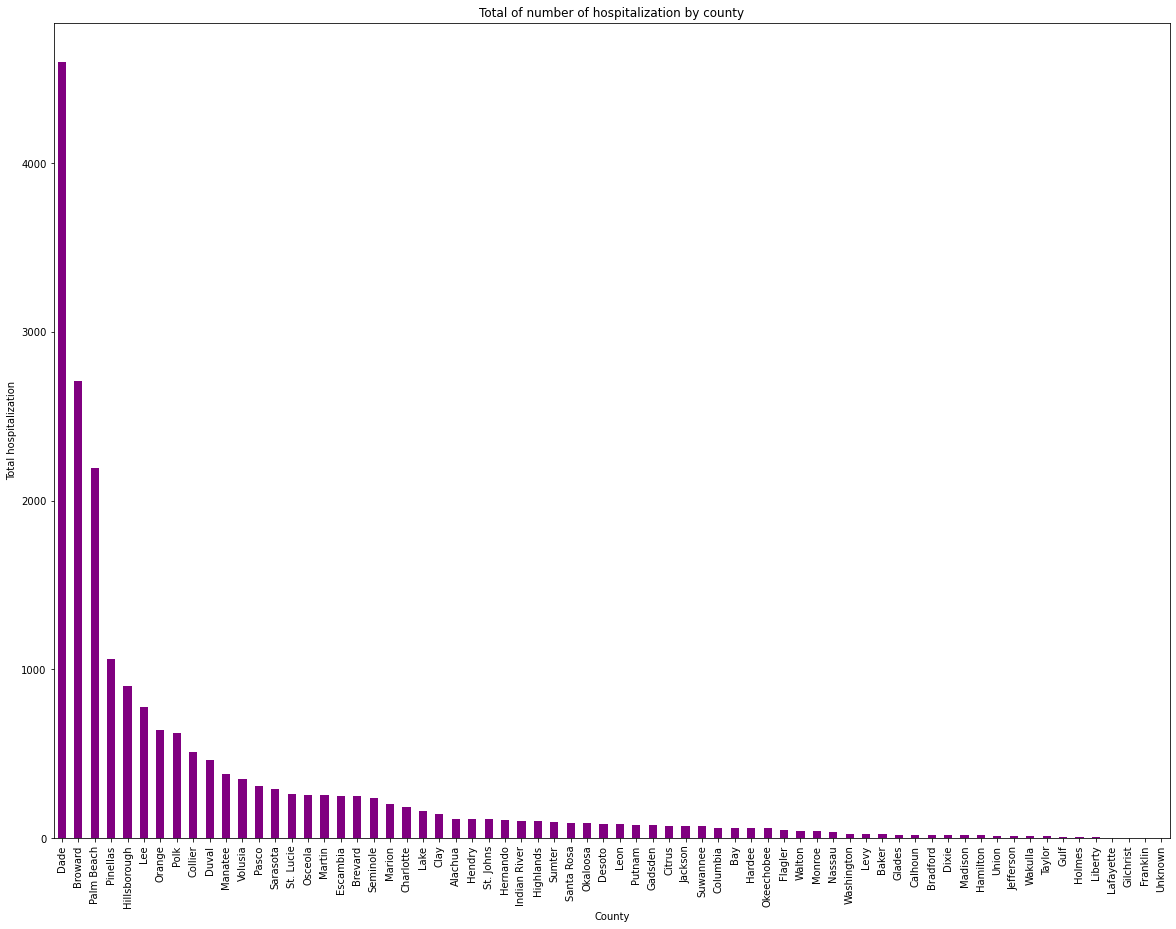

In [14]:
#Total number of hospitalization by county

Total_hosp_by_county2 = hosp_filter_df["County"].value_counts().plot(kind= "bar", color = 'purple', figsize=(20, 15))

plt.title("Total of number of hospitalization by county")
plt.xlabel("County")
plt.ylabel("Total hospitalization")

Total_hosp_by_county2

In [ ]:
#Calcalate percentage hospitalized by age group 
#Calculate total hospitalized 
Total_hospitalized = hosp_filter_df["Hospitalized"].count()

#Group by age group and count total hospitalized by age category
demo_age_grouped = hosp_filter_df.groupby("Age_group")
total_hospitalize_count = demo_age_grouped["Hospitalized"].value_counts()

#Calculate percentage by age category
age_percentage = (total_hospitalize_count/Total_hospitalized) * 100

#Create a dataframe for values
Age_demographic_summary = pd.DataFrame({"Total Count": total_hospitalize_count, 
                                          "Percentage of hospitalized patients": age_percentage})
#Remove index name
#Age_demographic_summary.index.name =None

#Format percentage to two decimal places 
Age_demographic_summary["Percentage of hospitalized patients"] = Age_demographic_summary["Percentage of hospitalized patients"].map("{0:,.3}%".format)
Age_demographic_summary



In [ ]:
#Hospitalization vs age plot

Age_demographic_summary["Total Count"].plot(kind= "bar", color = "g", figsize=(20, 10))

plt.title("Hospitalized Patients by age")
plt.xlabel("Age Group, Hospitalized")
plt.ylabel("Number of Hospitalization")

plt.show()


In [ ]:
#Compare travel-related hospitalization to non-travel-related hospitalization (Not done yet) (Chika)
travel_vs_nontravel_hosp = hosp_filter_df["Travel_related"].value_counts()

#Plottravel_vs_nontravel

colors = ['blue', 'red', 'green']
explode = (0.1, 0, 0)
travel_vs_nontravel_hosp.plot(kind="pie", colors= colors, explode= explode, startangle=140, shadow = True, autopct='%1.1f%%')
plt.title("Travel Related Hospitalization")
plt.show()

In [ ]:
#Create new dataframe for date and hospitalization
sec_hosp_data_df = hosp_filter_df.filter(["County",'Hospitalized', "Age", "Age_group", "Gender", 'Date'], axis=1)
sec_hosp_data_df


In [ ]:
#Divide hospitalization case date data in two groups of data 
#prior to reopening and after reopening and create new dataframe (Kurt) consider total (Chika)

#Convert Date to datetime 

sec_hosp_data_df['Date'] = pd.to_datetime(sec_hosp_data_df["Date"], format ="%Y-%m-%d")

Before_start_date = "2020-01-01"
Before_end_date = '2020-05-03'

mask = (sec_hosp_data_df['Date'] > Before_start_date) & (sec_hosp_data_df['Date'] <= Before_end_date)

hosp_filter_df_new = sec_hosp_data_df.loc[mask]
hosp_filter_df_new.head(10)

In [ ]:
#Calculate hospitalization per county for before reopening and plot chart

my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  # red, green, blue, black, etc.
my_colormap = ListedColormap(my_colors)

Before_hosp_county = hosp_filter_df_new["County"].value_counts().plot(kind= "barh", color = 'orange', figsize=(20, 15))

#chart title
plt.title("Total Hospitalization for each county before reopening")
plt.xlabel("County")
plt.ylabel("Number of Hospitalization")

plt.show()


In [ ]:
#Line Graph for hospitalization and cases 


x_axis = hosp_filter_df[""]
Case = plt.plot

In [ ]:
#Average age of patients hospitalized before shut down


Avg_hosp_count = hosp_filter_df_new["Hospitalized"].value_counts()

#Average age of patients hospitalized 
Average_age_new_df = hosp_filter_df_new['Age'].mean()
Median_age_new_df = hosp_filter_df_new['Age'].median()

hosp_age_new_df = pd.DataFrame({"Total Hospitalized Before Reopening": Avg_hosp_count, 
                      "Average Age": [Average_age_new_df], "Median Age": [Median_age_new_df]})

hosp_age_new_df["Average Age"] = hosp_age_new_df["Average Age"].map("{0:,.3}years".format)
hosp_age_new_df["Median Age"] = hosp_age_new_df["Median Age"].map("{0:,.3}years".format)
hosp_age_new_df

In [ ]:
#summary statistics table for mean, median, variance, standara deviation and SEM of age for each county
summary_stat_df = hosp_filter_df_new.groupby(["County"]).agg({"Age":["mean","median","var","std","sem"]})
summary_stat_df.head()

In [ ]:
hosp_filter_df_new['Date'] = pd.to_datetime(hosp_filter_df_new['Date'], errors='coerce')
hosp_filter_df_new['Case_Date'] = hosp_filter_df_new["Date"].dt.strftime("%m")
hosp_filter_df_new

In [ ]:
#Divide hospitalization case date data in two groups of data 
#prior to reopening and after reopening and create new dataframe (Kurt) consider total (Chika)

#Convert Date to datetime 

sec_hosp_data_df['Date'] = pd.to_datetime(sec_hosp_data_df["Date"], format ="%Y-%m-%d")

After_start_date = "2020-05-04"
After_end_date = '2020-07-15'

mask = (sec_hosp_data_df['Date'] > After_start_date) & (sec_hosp_data_df['Date'] <= After_end_date)

hosp_filter_df_new1 = sec_hosp_data_df.loc[mask]
hosp_filter_df_new1

In [ ]:
#Calculate hospitalization per county for before reopening 

#my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  # red, green, blue, black, etc.
#my_colormap = ListedColormap(my_colors)

After_hosp_county = hosp_filter_df_new1["County"].value_counts().plot(kind= "barh", figsize=(20, 15))

#chart title
plt.title("Total Hospitalization for each county after reopening")
plt.xlabel("County")
plt.ylabel("Number of Hospitalization")

plt.show()

In [ ]:
hosp_filter_df_new['Date'] = pd.to_datetime(hosp_filter_df_new['Date'], errors='coerce')
hosp_filter_df_new['Case_Date'] = hosp_filter_df_new["Date"].dt.strftime("%m")
hosp_filter_df_new

In [ ]:
#Average age of patients hospitalized after reopening

Avg_hosp_count1 = hosp_filter_df_new1["Hospitalized"].value_counts()

#Average age of patients hospitalized 
Average_age_new_df1 = hosp_filter_df_new1['Age'].mean()
Median_age_new_df1 = hosp_filter_df_new1['Age'].median()


hosp_age_new_df1 = pd.DataFrame({"Total Hospitalized after reopening": Avg_hosp_count1, 
                      "Average Age": [Average_age_new_df1], "Median Age": [Median_age_new_df1]})

hosp_age_new_df1["Average Age"] = hosp_age_new_df1["Average Age"].map("{0:,.3}years".format)
hosp_age_new_df1["Median Age"] = hosp_age_new_df1["Median Age"].map("{0:,.3}years".format)
hosp_age_new_df1

In [ ]:
#Average hospitalization by month

#Average hospitalization by month

In [ ]:
#Avg hospitalization vs Avg case by month (Line Graph)

In [ ]:
#Hospitalization before reopening vs after reopening (Line Graph)